# Chap 3 EX

## [Ordinary Least Squares](https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html#examples-notebooks-generated-ols--page-root)

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

np.random.seed(98766789)

In [2]:
#Ols estimation
# Artificial data:
nsample = 100
x = np.linspace(0,10,100)
X = np.column_stack((x,x ** 2))
beta = np.array([1,0.1,10])
e = np.random.normal(size=nsample)

In [3]:
#Our model needs an intercept so we add a column of 1s:
X = sm.add_constant(X)
y = np.dot(X,beta) + e

In [4]:
#Fit and summary
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.347e+06
Date:                Thu, 18 Nov 2021   Prob (F-statistic):          2.05e-235
Time:                        17:57:31   Log-Likelihood:                -155.73
No. Observations:                 100   AIC:                             317.5
Df Residuals:                      97   BIC:                             325.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8308      0.343      2.423      0.0

Quantities of interest can be extracted directly from the fitted model. Type dir(results) for a full list. Here are some examples:

In [5]:
print(f'Parameters: {results.params}, R2 :{results.rsquared}')

Parameters: [0.83078393 0.1286874  9.99967965], R2 :0.9999855098683551


### OLS non-linear curve but linear in parameters

We simulate artificial data with a non-linear relationship between x and y:

In [6]:
nsample = 50
sig = 0.5
x = np.linspace(0,20,nsample)
X = np.column_stack((x,np.sin(x),(x-5) ** 2,np.ones(nsample)))
beta = [0.5,0.5,-0.02,5]

y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

In [7]:
# Fit and summary
res = sm.OLS(y,X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     307.0
Date:                Thu, 18 Nov 2021   Prob (F-statistic):           2.03e-30
Time:                        17:57:31   Log-Likelihood:                -27.416
No. Observations:                  50   AIC:                             62.83
Df Residuals:                      46   BIC:                             70.48
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5176      0.023     22.556      0.0

Extract other quantities of interest:

In [8]:
print(f'Parameters: {res.params},Standard errors: {res.bse}, Predicted values: {res.predict()}')

Parameters: [ 0.51756497  0.66021463 -0.02157196  5.01618193],Standard errors: [0.02294622 0.09020428 0.00201469 0.14878414], Predicted values: [ 4.47688295  5.03464407  5.54216262  5.96345748  6.27553293  6.47215678
  6.5648843   6.58115972  6.55980722  6.54465222  6.57732102  6.69040168
  6.9020899   7.21319953  7.60702886  8.05210464  8.50735308  8.92884813
  9.2770284   9.52319702  9.65423644  9.67476356  9.60637127  9.48408073
  9.35058753  9.24924691  9.21695061  9.2780657   9.44043107  9.69406959
 10.01282731 10.35867044 10.68793423 10.95849696 11.13670042 11.20287986
 11.15459482 11.00703015 10.79050113 10.54547278 10.31591158 10.14206188
 10.05383386 10.06588942 10.17523321 10.36170481 10.59129099 10.82171403
 11.00937776 11.11653038]


### Draw a plot to compare the true relationship to OLS predictions. 

Confidence intervals around the predictions are built using the `wls_prediction_std` command.

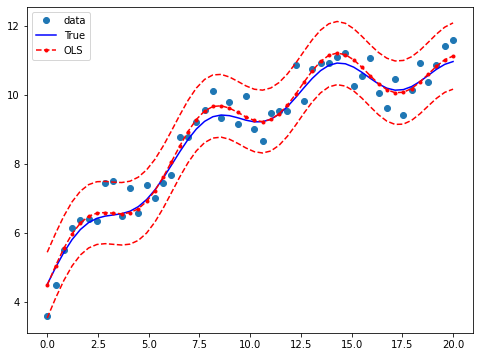

In [9]:
prstd, iv_l, iv_u = wls_prediction_std(res) #return std var and confidence intervals

__, ax = plt.subplots(figsize=(8,6))

ax.plot(x,y,'o',label="data")
ax.plot(x,y_true,'b-',label="True")
ax.plot(x,res.fittedvalues,'r--.', label="OLS")
ax.plot(x, iv_u,"r--")
ax.plot(x,iv_l,"r--")
ax.legend(loc="best")

### OLS with dummy variables

We generate some artificial data. There are 3 groups which will be modelled using dummy variables. Group 0 is the omitted/benchmark category. 

**To be continued...**